In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

# from keras.models import Sequential
# from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

/Users/andiklausli/opt/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/andiklausli/opt/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/andiklausli/opt/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/andiklausli/opt/miniconda3/lib/python3.7/s

In [2]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Cleansing

In [3]:
df.info() # non NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# replace Category 
dict_trans = {'ham' : 0, 'spam': 1}
df = df.replace({"Category": dict_trans})

In [6]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Data Preparation

In [7]:
# train-/test-split

labels = df['Category'].values
messages = df['Message'].values
messages_train, messages_test, y_train, y_test = train_test_split(messages, labels, test_size=0.3, random_state=42)

In [8]:
# Vectorisation
vectorizer = CountVectorizer()
vectorizer.fit(messages_train)

X_train = vectorizer.transform(messages_train)
X_test  = vectorizer.transform(messages_test)

In [9]:
X_train

<3900x7262 sparse matrix of type '<class 'numpy.int64'>'
	with 52129 stored elements in Compressed Sparse Row format>

# Build CountVectorizer Model

In [12]:
def model_base_seq(input_dim):
    model = keras.Sequential()
    model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    return model

In [13]:
model=model_base_seq(input_dim=X_train.shape[1])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                72630     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 72,641
Trainable params: 72,641
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 3900 samples, validate on 1672 samples


2021-09-10 21:06:06.198366: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-10 21:06:06.198795: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
3900/3900 [==============================] - 1s 293us/sample - loss: 0.2943 - acc: 0.9390 - val_loss: 0.1157 - val_acc: 0.9821
Epoch 2/100
3900/3900 [==============================] - 1s 195us/sample - loss: 0.0713 - acc: 0.9887 - val_loss: 0.0645 - val_acc: 0.9892
Epoch 3/100
3900/3900 [==============================] - 1s 192us/sample - loss: 0.0314 - acc: 0.9946 - val_loss: 0.0516 - val_acc: 0.9892
Epoch 4/100
3900/3900 [==============================] - 1s 197us/sample - loss: 0.0173 - acc: 0.9985 - val_loss: 0.0492 - val_acc: 0.9892
Epoch 5/100
3900/3900 [==============================] - 1s 193us/sample - loss: 0.0113 - acc: 0.9987 - val_loss: 0.0458 - val_acc: 0.9892
Epoch 6/100
3900/3900 [==============================] - 1s 194us/sample - loss: 0.0080 - acc: 0.9990 - val_loss: 0.0462 - val_acc: 0.9898
Epoch 7/100
3900/3900 [==============================] - 1s 195us/sample - loss: 0.0058 - acc: 0.9990 - val_loss: 0.0470 - val_acc: 0.9898
Epoch 8/100
3900/3900 [====

# Model Performance

In [15]:
# model performance
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9868


In [16]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)

y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

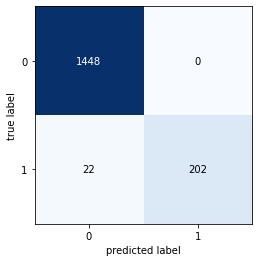

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat)